In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from statistics import stdev
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('QVI_data.csv')

In [3]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [6]:
df['YEAR_MONTH'] = pd.to_numeric([''.join(i.split('-')[:2]) for i in df.DATE])

In [7]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [8]:
missing_mnths = pd.pivot_table(df,index='STORE_NBR',columns='YEAR_MONTH',values='TXN_ID',aggfunc='count')

In [9]:
rem_stores = missing_mnths[missing_mnths.isnull().any(axis=1)].index.tolist()

In [10]:
sales = df.groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].sum()

In [11]:
avgprice = df.groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].sum() / df.groupby(['STORE_NBR','YEAR_MONTH'])['PROD_QTY'].sum()

In [12]:
count_custs = df.groupby(['STORE_NBR','YEAR_MONTH'])['LYLTY_CARD_NBR'].nunique()

In [13]:
txn_cust = pd.DataFrame(df.groupby(['STORE_NBR','YEAR_MONTH'])['TXN_ID'].nunique() / df.groupby(['STORE_NBR','YEAR_MONTH'])['LYLTY_CARD_NBR'].nunique())
# txn_cust.reset_index(inplace=True)

In [14]:
count_chips = df.groupby(['STORE_NBR','YEAR_MONTH'])['PROD_QTY'].sum() / df.groupby(['STORE_NBR','YEAR_MONTH'])['TXN_ID'].nunique()

In [15]:
df_rollup = [sales,avgprice,count_custs,txn_cust,count_chips]

In [16]:
fin_df = pd.concat(df_rollup,join='outer',axis=1)
fin_df.columns = ['TOT_SALES','AVG_PRICE_PER_UNIT','N_CUSTOMERS','N_CHIPS_CUSTS','N_CHIPS_TXN']
fin_df.reset_index(inplace=True)

In [17]:
fin_df = fin_df[~fin_df['STORE_NBR'].isin(rem_stores)]

In [18]:
fin_df.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,AVG_PRICE_PER_UNIT,N_CUSTOMERS,N_CHIPS_CUSTS,N_CHIPS_TXN
0,1,201807,206.9,3.337097,49,1.061224,1.192308
1,1,201808,176.1,3.261111,42,1.023810,1.255814
2,1,201809,278.8,3.717333,59,1.050847,1.209677
3,1,201810,188.1,3.243103,44,1.022727,1.288889
4,1,201811,192.6,3.378947,46,1.021739,1.212766


In [19]:
pre_trial_df = fin_df.loc[fin_df['YEAR_MONTH'] < 201902,:]

In [20]:
def control_store(trial,metric,weight_corr,data):
    res = pd.DataFrame({'TrialStore':[],'ControlStore':[],'Correlation':[],'Score':[]})
    trial_store = data.loc[data['STORE_NBR'] == trial,metric]
    trial_store.reset_index(drop=True,inplace=True)
    store_nbr = data['STORE_NBR'].unique()
    for i in store_nbr:
        temp = data.loc[data['STORE_NBR'] == i,metric]
        temp.reset_index(drop=True,inplace=True)
        score_ = abs(trial_store-temp)
        score = np.mean(1-(score_-min(score_))/(max(score_)-min(score_)))
        res = res.append({'TrialStore':trial,'ControlStore':i,'Correlation':temp.corr(trial_store),'Score':score},ignore_index=True)
    res['fin_score'] = weight_corr * res['Correlation'] + (1-weight_corr) * res['Score']
    res.set_index(['TrialStore','ControlStore'],inplace=True)
    return res

In [21]:
trial_stores = [77,86,88]

In [22]:
pre_trial_df.columns

Index(['STORE_NBR', 'YEAR_MONTH', 'TOT_SALES', 'AVG_PRICE_PER_UNIT',
       'N_CUSTOMERS', 'N_CHIPS_CUSTS', 'N_CHIPS_TXN'],
      dtype='object')

In [23]:
t_store = 77

In [24]:
tc_sales = control_store(t_store,'TOT_SALES',0.5,pre_trial_df)

In [25]:
tc_sales.head()

Correlation     Score  fin_score
TrialStore ControlStore                                  
77.0       1.0              0.075218  0.408163   0.241691
           2.0             -0.263079  0.590119   0.163520
           3.0              0.806644  0.522914   0.664779
           4.0             -0.263300  0.644934   0.190817
           5.0             -0.110652  0.516320   0.202834

In [26]:
tc_custs = control_store(t_store,'N_CUSTOMERS',0.5,pre_trial_df)

In [27]:
tc_custs.head()

Correlation     Score  fin_score
TrialStore ControlStore                                  
77.0       1.0              0.322168  0.663866   0.493017
           2.0             -0.572051  0.471429  -0.050311
           3.0              0.834207  0.489796   0.662002
           4.0             -0.295639  0.498258   0.101310
           5.0              0.370659  0.512605   0.441632

In [28]:
tc_avgprice = control_store(t_store,'AVG_PRICE_PER_UNIT',0.5,pre_trial_df)

In [29]:
tc_avgprice.head()

Correlation     Score  fin_score
TrialStore ControlStore                                  
77.0       1.0             -0.842303  0.585197  -0.128553
           2.0              0.250020  0.627857   0.438938
           3.0             -0.002904  0.518489   0.257793
           4.0             -0.407973  0.531141   0.061584
           5.0              0.267377  0.510465   0.388921

In [30]:
control_store_df = pd.concat([tc_sales['fin_score'],tc_custs['fin_score'],tc_avgprice['fin_score']],axis=1)
control_store_df.columns = ['sales_score','custs_score','avgprice_score']

In [31]:
control_store_df.head()

sales_score  custs_score  avgprice_score
TrialStore ControlStore                                          
77.0       1.0              0.241691     0.493017       -0.128553
           2.0              0.163520    -0.050311        0.438938
           3.0              0.664779     0.662002        0.257793
           4.0              0.190817     0.101310        0.061584
           5.0              0.202834     0.441632        0.388921

In [32]:
control_store_df['fin_score'] = (control_store_df['sales_score']+control_store_df['custs_score']+control_store_df['avgprice_score'])/3
control_store_df.sort_values(by='fin_score',ascending=False,inplace=True)

In [33]:
control_store_df.head()

sales_score  custs_score  avgprice_score  fin_score
TrialStore ControlStore                                                     
77.0       157.0            0.580429     0.651573        0.751482   0.661161
           167.0            0.590409     0.680385        0.527865   0.599553
           162.0            0.610291     0.626244        0.537008   0.591181
           84.0             0.656972     0.715000        0.341074   0.571015
           71.0             0.789497     0.663123        0.257262   0.569961

In [34]:
control_store_df.index[0][1]

157.0

In [35]:
pre_trial_df.head(2)

,STORE_NBR,YEAR_MONTH,TOT_SALES,AVG_PRICE_PER_UNIT,N_CUSTOMERS,N_CHIPS_CUSTS,N_CHIPS_TXN
0,1,201807,206.9,3.337097,49,1.061224,1.192308
1,1,201808,176.1,3.261111,42,1.023810,1.255814


In [37]:
viz_df = pre_trial_df.loc[pre_trial_df[(pre_trial_df['STORE_NBR'] == t_store) | (pre_trial_df['STORE_NBR'] == control_store_df.index[0][1])].index]

In [38]:
viz_df['YEAR_MONTH'] = pd.to_datetime(viz_df['YEAR_MONTH'].astype(str),format='%Y%m')

In [39]:
viz_df['store_type'] = np.where(viz_df['STORE_NBR'] == t_store,'Trial Store','Control Store')

In [40]:
viz_df

,STORE_NBR,YEAR_MONTH,TOT_SALES,AVG_PRICE_PER_UNIT,N_CUSTOMERS,N_CHIPS_CUSTS,N_CHIPS_TXN,store_type
880,77,2018-07-01,296.8,3.533333,51,1.078431,1.527273,Trial Store
881,77,2018-08-01,255.5,3.452703,47,1.021277,1.541667,Trial Store
882,77,2018-09-01,225.2,3.217143,42,1.047619,1.590909,Trial Store
883,77,2018-10-01,204.5,3.932692,37,1.027027,1.368421,Trial Store
884,77,2018-11-01,245.3,3.661194,41,1.073171,1.522727,Trial Store
885,77,2018-12-01,267.3,3.712500,46,1.043478,1.500000,Trial Store
886,77,2019-01-01,204.4,3.144615,35,1.114286,1.666667,Trial Store
1817,157,2018-07-01,1045.4,3.416340,124,1.233871,2.000000,Control Store
1818,157,2018-08-01,904.1,3.504264,103,1.320388,1.897059,Control Store
1819,157,2018-09-01,887.6,3.387786,104,1.250000,2.015385,Control Store


In [41]:
def trial_control_plot(data,metric):
    control = data.loc[data['store_type'] == 'Control Store',['YEAR_MONTH',metric]]
    control.set_index('YEAR_MONTH',inplace=True)
    control.rename(columns={metric:'Control'},inplace=True)
    trial = data.loc[data['store_type'] == 'Trial Store',['YEAR_MONTH',metric]]
    trial.set_index('YEAR_MONTH',inplace=True)
    trial.rename(columns={metric:'Trial'},inplace=True)
    df_fin = pd.concat([control,trial],axis=1)
    return df_fin

In [42]:
df_viz = trial_control_plot(viz_df,'TOT_SALES')

In [43]:
df_viz.head(2)

,Control,Trial
YEAR_MONTH,,
2018-07-01,1045.4,296.8
2018-08-01,904.1,255.5


<AxesSubplot: xlabel='YEAR_MONTH'>

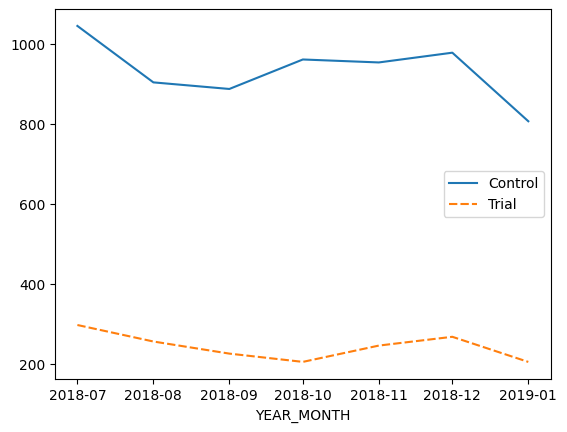

In [44]:
sns.lineplot(data=df_viz)

<strong>Not using avg price</strong>

In [66]:
control_store_df = pd.concat([tc_sales['fin_score'],tc_custs['fin_score']],axis=1)
control_store_df.columns = ['sales_score','custs_score']

In [67]:
control_store_df['fin_score'] = (control_store_df['sales_score']+control_store_df['custs_score'])/2
control_store_df.sort_values(by='fin_score',ascending=False,inplace=True)

In [68]:
control_store_df.head()

sales_score  custs_score  fin_score
TrialStore ControlStore                                     
77.0       233.0            0.697290     0.816607   0.756949
           71.0             0.789497     0.663123   0.726310
           84.0             0.656972     0.715000   0.685986
           119.0            0.636046     0.729729   0.682887
           115.0            0.708347     0.645155   0.676751

In [73]:
viz_df = pre_trial_df.loc[pre_trial_df[(pre_trial_df['STORE_NBR'] == t_store) | (pre_trial_df['STORE_NBR'] == control_store_df.index[0][1])].index]

In [74]:
viz_df['YEAR_MONTH'] = pd.to_datetime(viz_df['YEAR_MONTH'].astype(str),format='%Y%m')

In [75]:
viz_df['store_type'] = np.where(viz_df['STORE_NBR'] == t_store,'Trial Store','Control Store')

In [76]:
df_viz = trial_control_plot(viz_df,'TOT_SALES')

<AxesSubplot: xlabel='YEAR_MONTH'>

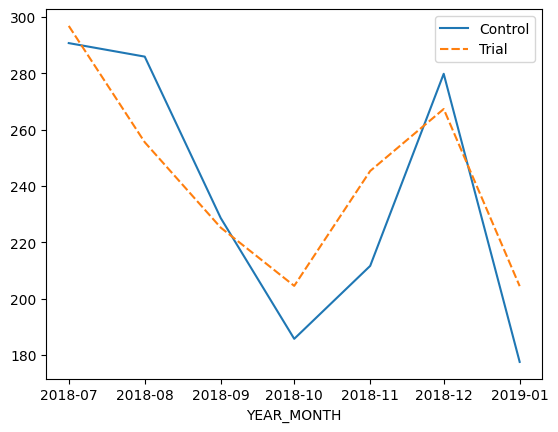

In [77]:
sns.lineplot(data=df_viz)

## Assessing the trials for Store 77

In [78]:
viz_df.head(1)

,STORE_NBR,YEAR_MONTH,TOT_SALES,AVG_PRICE_PER_UNIT,N_CUSTOMERS,N_CHIPS_CUSTS,N_CHIPS_TXN,store_type
880,77,2018-07-01,296.8,3.533333,51,1.078431,1.527273,Trial Store


In [58]:
trial_data  = viz_df.loc[viz_df['store_type'] == 'Trial Store','TOT_SALES'].sum()
control_data  = viz_df.loc[viz_df['store_type'] == 'Control Store','TOT_SALES'].sum()
assess_factor = trial_data / control_data

In [60]:
assess_factor

1.023617303289553

In [107]:
control_sales = pd.concat(df_rollup,join='outer',axis=1)
control_sales.reset_index(inplace=True)
control_sales['YEAR_MONTH'] = pd.to_datetime(control_sales['YEAR_MONTH'].astype(str),format='%Y%m')
control_sales = control_sales.loc[control_sales['STORE_NBR'] == 233]

In [108]:
control_sales.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,0,LYLTY_CARD_NBR,0,1
2699,233,2018-07-01,290.7,3.303409,51,1.058824,1.629630
2700,233,2018-08-01,285.9,3.573750,48,1.041667,1.600000
2701,233,2018-09-01,228.6,3.265714,42,1.071429,1.555556
2702,233,2018-10-01,185.7,3.316071,35,1.028571,1.555556
2703,233,2018-11-01,211.6,3.412903,40,1.025000,1.512195


In [109]:
control_sales['factored_sales'] = control_sales['TOT_SALES'] * assess_factor

In [173]:
diff_df = control_sales[['YEAR_MONTH','factored_sales']]
diff_df.reset_index(drop=True,inplace=True)

In [174]:
diff_df.head()

,YEAR_MONTH,factored_sales
0,2018-07-01,297.565550
1,2018-08-01,292.652187
2,2018-09-01,233.998916
3,2018-10-01,190.085733
4,2018-11-01,216.597421


In [175]:
fin_df.head(2)

,STORE_NBR,YEAR_MONTH,TOT_SALES,AVG_PRICE_PER_UNIT,N_CUSTOMERS,N_CHIPS_CUSTS,N_CHIPS_TXN
0,1,201807,206.9,3.337097,49,1.061224,1.192308
1,1,201808,176.1,3.261111,42,1.023810,1.255814


In [151]:
trial_sales = fin_df.loc[fin_df['STORE_NBR'] == t_store,['YEAR_MONTH','TOT_SALES']]

In [152]:
trial_sales = pd.DataFrame(trial_sales)
trial_sales.reset_index(drop=True,inplace=True)
trial_sales['YEAR_MONTH'] = pd.to_datetime(trial_sales['YEAR_MONTH'].astype(str),format='%Y%m')

In [176]:
diff_df = pd.concat([diff_df,trial_sales],axis=1)

In [177]:
diff_df

,YEAR_MONTH,factored_sales,YEAR_MONTH,TOT_SALES
0,2018-07-01,297.565550,2018-07-01,296.8
1,2018-08-01,292.652187,2018-08-01,255.5
2,2018-09-01,233.998916,2018-09-01,225.2
3,2018-10-01,190.085733,2018-10-01,204.5
4,2018-11-01,216.597421,2018-11-01,245.3
5,2018-12-01,286.408121,2018-12-01,267.3
6,2019-01-01,181.692071,2019-01-01,204.4
7,2019-02-01,249.762622,2019-02-01,235.0
8,2019-03-01,203.802205,2019-03-01,278.5
9,2019-04-01,162.345704,2019-04-01,263.5


In [178]:
diff_df.columns = ['YEAR_MONTH','factored_sales','REM','TOT_SALES']
diff_df.drop(columns='REM',inplace=True)
diff_df.rename(columns={'TOT_SALES':'trial_sales'},inplace=True)

In [179]:
diff_df.head()

,YEAR_MONTH,factored_sales,trial_sales
0,2018-07-01,297.565550,296.8
1,2018-08-01,292.652187,255.5
2,2018-09-01,233.998916,225.2
3,2018-10-01,190.085733,204.5
4,2018-11-01,216.597421,245.3


In [180]:
diff_df['%diff'] = abs(diff_df.factored_sales - diff_df.trial_sales)/ diff_df.factored_sales

In [181]:
diff_df['YEAR_MONTH'] = diff_df['YEAR_MONTH'].dt.strftime('%Y%m')

In [182]:
diff_df['YEAR_MONTH'] = pd.to_numeric(diff_df['YEAR_MONTH'])

In [186]:
sd = stdev(diff_df.loc[diff_df['YEAR_MONTH'] < 201902,'%diff'])

In [187]:
sd

0.049940762641425364

In [188]:
diff_df['t_val'] = (diff_df['%diff']-0)/sd

In [190]:
diff_df.loc[(diff_df['YEAR_MONTH'] > 201901) & (diff_df['YEAR_MONTH'] < 201905)]

,YEAR_MONTH,factored_sales,trial_sales,%diff,t_val
7,201902,249.762622,235.0,0.059107,1.183534
8,201903,203.802205,278.5,0.366521,7.339116
9,201904,162.345704,263.5,0.623080,12.476373


In [189]:
sp.stats.t.isf(0.05,7)

1.8945786050613054

In [192]:
control_sales.columns = ['STORE_NBR','YEAR_MONTH','TOT_SALES','AVG_PRICE_PER_UNIT','N_CUSTOMERS','N_CHIPS_CUSTS','N_CHIPS_TXN','factored_sales']

In [193]:
control_sales.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,AVG_PRICE_PER_UNIT,N_CUSTOMERS,N_CHIPS_CUSTS,N_CHIPS_TXN,factored_sales
2699,233,2018-07-01,290.7,3.303409,51,1.058824,1.629630,297.565550
2700,233,2018-08-01,285.9,3.573750,48,1.041667,1.600000,292.652187
2701,233,2018-09-01,228.6,3.265714,42,1.071429,1.555556,233.998916
2702,233,2018-10-01,185.7,3.316071,35,1.028571,1.555556,190.085733
2703,233,2018-11-01,211.6,3.412903,40,1.025000,1.512195,216.597421


In [194]:
c_sales = control_sales.loc[:,['YEAR_MONTH','factored_sales']]
c_sales.set_index('YEAR_MONTH',inplace=True)

In [195]:
c_sales.head()

,factored_sales
YEAR_MONTH,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421


In [213]:
c_sales['Control 95% C.I'] = c_sales['factored_sales'] * (1-sd*2)
c_sales['Control 5% C.I'] = c_sales['factored_sales'] * (1+sd)

In [214]:
t_sales = pd.concat(df_rollup,join='outer',axis=1)
t_sales.reset_index(inplace=True)
t_sales['YEAR_MONTH'] = pd.to_datetime(t_sales['YEAR_MONTH'].astype(str),format='%Y%m')

In [215]:
t_sales = t_sales.loc[t_sales['STORE_NBR'] == t_store,['YEAR_MONTH','TOT_SALES']]
t_sales.set_index('YEAR_MONTH',inplace=True)

In [216]:
fin_sales = pd.merge(c_sales,t_sales,left_index=True,right_index=True)

In [218]:
fin_sales.columns = ['Control Sales', 'Control Sales 95% Confidence Interval','Control Sales 5% Confidence Interval','Trial Store Sales']

<AxesSubplot: xlabel='YEAR_MONTH'>

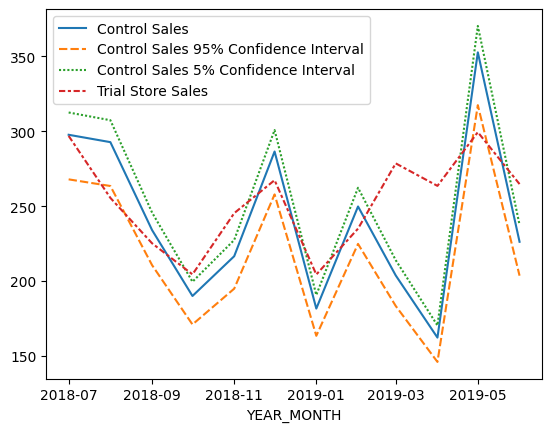

In [219]:
sns.lineplot(data=fin_sales)

In [226]:
cust_data = pre_trial_df
cust_data = cust_data.loc[cust_data[(cust_data['STORE_NBR'] == t_store) | (cust_data['STORE_NBR'] == control_store_df.index[0][1])].index]
cust_data['store_type'] = np.where(cust_data['STORE_NBR'] == t_store,'Trial Store','Control Store')
cust_data['YEAR_MONTH'] = pd.to_numeric(cust_data['YEAR_MONTH'])

In [239]:
pre_trial_df.head(1)

,STORE_NBR,YEAR_MONTH,TOT_SALES,AVG_PRICE_PER_UNIT,N_CUSTOMERS,N_CHIPS_CUSTS,N_CHIPS_TXN
0,1,201807,206.9,3.337097,49,1.061224,1.192308


In [235]:
c_custs = cust_data.loc[cust_data['store_type'] == 'Control Store',['YEAR_MONTH','N_CUSTOMERS']]
c_custs['YEAR_MONTH'] = pd.to_datetime(c_custs['YEAR_MONTH'],format='%Y%m')
c_custs.rename(columns={'N_CUSTOMERS':'Num_Customers_Control_Store'},inplace=True)
c_custs.set_index('YEAR_MONTH',inplace=True)
t_custs = cust_data.loc[cust_data['store_type'] == 'Trial Store',['YEAR_MONTH','N_CUSTOMERS']]
t_custs['YEAR_MONTH'] = pd.to_datetime(t_custs['YEAR_MONTH'],format='%Y%m')
t_custs.rename(columns={'N_CUSTOMERS':'Num_Customers_Trial_Store'},inplace=True)
t_custs.set_index('YEAR_MONTH',inplace=True)

In [238]:
merged_custs = pd.concat([c_custs,t_custs],axis=1)

In [241]:
tc = pre_trial_df.loc[pre_trial_df['STORE_NBR'] == t_store,'N_CUSTOMERS'].sum()
cc = pre_trial_df.loc[pre_trial_df['STORE_NBR'] == control_store_df.index[0][1],'N_CUSTOMERS'].sum()
assess_factor = tc/cc
assess_factor

1.0033557046979866

In [243]:
c_custs['control customers'] = c_custs['Num_Customers_Control_Store'] * assess_factor

In [256]:
c_custs = pd.concat(df_rollup,join='outer',axis=1)
c_custs.reset_index(inplace=True)
c_custs['YEAR_MONTH'] = pd.to_datetime(c_custs['YEAR_MONTH'].astype(str),format='%Y%m')
c_custs = c_custs.loc[c_custs['STORE_NBR'] == 233]
c_custs = c_custs[['YEAR_MONTH','LYLTY_CARD_NBR']]
c_custs.columns = ['YEAR_MONTH','Control Customers']
c_custs.reset_index(drop=True,inplace=True)

In [257]:
t_custs = pd.concat(df_rollup,join='outer',axis=1)
t_custs.reset_index(inplace=True)
t_custs['YEAR_MONTH'] = pd.to_datetime(t_custs['YEAR_MONTH'].astype(str),format='%Y%m')
t_custs = t_custs.loc[t_custs['STORE_NBR'] == 77]
t_custs = t_custs[['YEAR_MONTH','LYLTY_CARD_NBR']]
t_custs.columns = ['YEAR_MONTH','Trial Customers']
t_custs.reset_index(drop=True,inplace=True)

In [266]:
merged_custs = pd.concat([c_custs,t_custs],axis=1)
merged_custs.columns = ['YEAR_MONTH','Control_Customers','rem','Trial_Customers']
merged_custs.drop(columns='rem',inplace=True)

In [267]:
merged_custs['Control_Customers'] = merged_custs['Control_Customers'] * assess_factor

In [268]:
merged_custs['%diff'] = abs(merged_custs.Control_Customers - merged_custs.Trial_Customers) / merged_custs.Control_Customers

In [271]:
merged_custs['YEAR_MONTH'] = merged_custs['YEAR_MONTH'].dt.strftime('%Y%m')
merged_custs['YEAR_MONTH'] = pd.to_numeric(merged_custs['YEAR_MONTH'])

In [272]:
sd = stdev(merged_custs.loc[merged_custs['YEAR_MONTH'] < 201902,'%diff'])

In [273]:
sd

0.018240748558243945

In [274]:
merged_custs['t_val'] = (merged_custs['%diff'] - 0)/sd

In [276]:
merged_custs.loc[(merged_custs['YEAR_MONTH'] > 201901) & (merged_custs['YEAR_MONTH'] < 201905),'t_val']

7     0.183352
8    13.476388
9    30.778725
Name: t_val, dtype: float64

In [277]:
sp.stats.t.isf(0.05,7)

1.8945786050613054

In [ ]:
controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers

In [281]:
merged_custs = merged_custs[['YEAR_MONTH','Control_Customers','Trial_Customers']]
merged_custs.loc[:,'Control NCustomers 5% Confidence Interval'] = merged_custs['Control_Customers'] * (1- sd*2)
merged_custs.loc[:,'Control NCustomers 95% Confidence Interval'] = merged_custs['Control_Customers'] * (1 + sd*2)

In [286]:
merged_custs['YEAR_MONTH'] = pd.to_datetime(merged_custs['YEAR_MONTH'],format='%Y%m')
merged_custs.set_index('YEAR_MONTH',inplace=True)

<AxesSubplot: xlabel='YEAR_MONTH'>

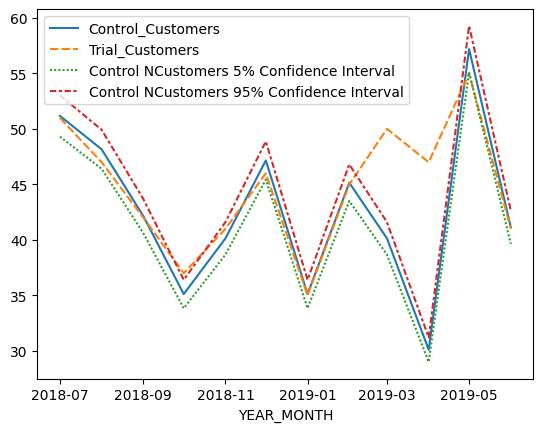

In [287]:
sns.lineplot(data=merged_custs)

## Conclusion

#### Trial store 77
- The sales of store 77 lies outside the 5% and in 2 of 3 trial months.
#### Trial store 86
- Performance lies within the 5% and 95% CI, not significantly different to its control store.
- The trial had a significant impact on increasing the number of customers, as the # of customers is significantly higher in all trial months. However sales trend doesn't match this. We must check if there were sales in the trial store that may have caused this.
#### Trial store 88
- Sales performance is significantly different to control store.
- The # of customers for the trial store in trial period is significantly higher than the control store for 2 of the 3 months period.